In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image


# Load dataset
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1CxwkO90vNNmUyPHoZxNpsng6rRTneVYv/export?format=xlsx")

# Encode labels dengan LabelEncoder
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

# Hitung average dan range parameter untuk setiap tanaman
average_values = df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean()
parameter_ranges = df[['temperature', 'humidity', 'rainfall']].agg(['min', 'max'])

# Print average dan range sebagai referensi
print("Average Parameters per Crop:")
print(average_values)
print("\nParameter Ranges for Validation:")
print(parameter_ranges)

# Fitur dan label
X = df[['temperature', 'humidity', 'rainfall']]
y = df['encoded_label']

# Split data menjadi training, validation, dan test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Membuat dataset untuk TensorFlow
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)


Average Parameters per Crop:
                     temperature   humidity    rainfall
label                                                  
anggur                 23.849575  81.875228   69.611829
apel                   22.630942  92.333383  112.654779
delima                 21.837842  90.125504  107.528442
goni                   24.958376  79.639864  174.792798
jagung                 22.389204  65.092249   84.766988
jeruk                  22.765725  92.170209  110.474969
kacang arab            18.872847  16.860439   80.058977
kacang bali            27.741762  48.061633  149.457564
kacang hijau           28.525775  85.499975   48.403601
kacang lentil          24.509052  64.804785   45.680454
kacang lentil hitam    29.973340  65.118426   67.884151
kacang mat             28.194920  53.160418   51.198487
kacang merah           20.115085  21.605357  105.919778
kapas                  23.988958  79.843474   80.398043
kelapa                 27.409892  94.844272  175.686646
kopi               

In [1]:
# Data tanaman

tanaman_data = {
    'anggur': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_anggur.jpg',
        'deskripsi': 'Tanaman merambat yang menghasilkan buah anggur yang digunakan untuk konsumsi langsung, membuat jus, atau anggur fermentasi (wine). Anggur memerlukan iklim hangat dan banyak sinar matahari.',
        'jenis_tanah': 'Tanah berdrainase baik, gembur, dan sedikit berbatu. Tanah berpasir lebih disarankan',
        'ph': '6.0 - 6.5',
        'waktu_penanaman': '2-3 tahun',
        'cara_merawat': 'Penyiraman 2-3 kali seminggu, tergantung cuaca. Pemangkasan rutin untuk menghindari pertumbuhan berlebih dan mendukung kualitas buah.'
    },
    'apel': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_apel.jpg',
        'deskripsi': 'Pohon apel memiliki cabang yang kokoh, dengan buah manis atau asam tergantung varietasnya. Apel membutuhkan banyak sinar matahari dan iklim dingin untuk berkembang dengan baik',
        'jenis_tanah': 'Tanah lempung yang subur dan dengan drainase yang baik',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '3-4 tahun',
        'cara_merawat': 'Penyiraman secukupnya, 2-3 kali seminggu. Tanaman ini memerlukan pemangkasan tahunan untuk pertumbuhan yang baik.'
    },
    'delima': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_delima.jpg',
        'deskripsi': 'Delima adalah tanaman semak atau pohon kecil yang menghasilkan buah dengan kulit tebal dan biji yang manis dan berair. Tanaman ini bisa bertahan di daerah yang kering',
        'jenis_tanah': 'Tanah berpasir dengan drainase yang baik.',
        'ph': '5.5 – 7.0',
        'waktu_penanaman': '2-3 tahun',
        'cara_merawat':'Penyiraman rutin setiap 3-4 hari. Tidak memerlukan pemangkasan terlalu sering. Berikan pupuk organik untuk meningkatkan hasil.'
    },
    'goni': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_goni.jpg',
        'deskripsi': 'Goni adalah tanaman tropis yang menghasilkan buah besar yang mirip dengan durian tetapi lebih manis. Buahnya digunakan dalam berbagai hidangan dan cukup populer di Asia Tenggara',
        'jenis_tanah': 'Tanah berpasir dengan drainase yang baik.',
        'ph': '5.5 – 7.0',
        'waktu_penanaman': '3-5 tahun',
        'cara_merawat':'Penyiraman 2-3 kali seminggu selama musim kering. Pemangkasan tahunan untuk membentuk pohon dan mempercepat produksi.'
    },
    'jagung': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_jagung.jpg',
        'deskripsi': 'Jagung adalah tanaman tahunan yang dikenal dengan batang tegak dan buah berbiji banyak. Tanaman ini adalah sumber pangan penting yang dapat dimakan langsung atau diolah menjadi berbagai produk',
        'jenis_tanah': 'Tanah yang kaya akan bahan organik, berdrainase baik, dan tekstur lempung atau loam',
        'ph': '5.8 – 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat':'Penyiraman 1-2 kali sehari pada musim kering. Tanaman ini membutuhkan banyak sinar matahari.'
    },
    'jeruk': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_jeruk.jpg',
        'deskripsi': 'Pohon kecil yang menghasilkan buah jeruk dengan rasa manis asam. Umumnya tumbuh di daerah tropis dan subtropis.',
        'jenis_tanah': 'Tanah berpasir dan berdrainase baik',
        'ph': '6.0-7.0',
        'waktu_penanaman': '2-3 tahun',
        'cara_merawat':'Penyiraman 2 kali sehari saat musim kering. Pemangkasan untuk membentuk pohon dan meningkatkan produksi buah.'
    },
    'kacang_arab': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_arab.jpg',
        'deskripsi': 'Tanaman leguminosa yang menghasilkan polong kacang besar, kaya protein. Umumnya ditanam di daerah dataran tinggi.',
        'jenis_tanah': 'Tanah lempung berpasir',
        'ph': '6.0 - 7.5',
        'waktu_penanaman': '5-6 bulan',
        'cara_merawat':'Penyiraman 1-2 kali sehari. Tidak memerlukan pemangkasan, namun tanaman perlu diberi pupuk organik untuk hasil optimal.'
    },
    'kacang_bali': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_bali.jpg',
        'deskripsi': 'Tanaman leguminosa yang menghasilkan kacang besar berwarna putih hingga krem. Dikenal karena nilai gizinya yang tinggi.',
        'jenis_tanah': 'Tanah gembur, drainase baik',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat': 'Penyiraman setiap 2-3 hari. Pemangkasan diperlukan untuk mencegah pertumbuhan yang tidak terkontrol.'
    },
    'kacang_hijau': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_hijau.jpg',
        'deskripsi': 'Tanaman legum cepat tumbuh, digunakan dalam berbagai masakan. Sangat efisien untuk tanaman di daerah tropis.',
        'jenis_tanah': 'Tanah gembur dan subur',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '2-3 bulan',
        'cara_merawat': 'Penyiraman setiap 2 hari. Pemangkasan minimal, fokus pada pengendalian hama dan penyakit.'
    },
    'kacang_lentil': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_lentil.jpg',
        'deskripsi': 'Tanaman legum yang menghasilkan kacang kecil dan kaya protein, digunakan untuk berbagai masakan.',
        'jenis_tanah': 'Tanah lempung dan gembur',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat':'Penyiraman 2-3 kali seminggu. Tanaman membutuhkan tanah yang kering dan terhindar dari genangan air.'
    },
    'kacang_lentil_hitam': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_lentil_hitam.jpg',
        'deskripsi': 'Varietas kacang lentil yang lebih gelap, sering digunakan dalam masakan India. Memiliki kandungan gizi yang baik.',
        'jenis_tanah': 'Tanah berdrainase baik',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat':'Penyiraman 2 kali seminggu. Tidak memerlukan banyak pemangkasan, tetapi perlu perhatian terhadap hama dan penyakit.'
    },
    'kacang_mat': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_mat.jpg',
        'deskripsi': 'Kacang kecil yang kaya akan protein, sering digunakan dalam makanan diet dan produk makanan ringan.',
        'jenis_tanah': 'Tanah berpasir dan subur',
        'ph': '6.0 - 7.5',
        'waktu_penanaman': '4-5 bulan',
        'cara_merawat':'Penyiraman setiap 3-4 hari. Pemangkasan tidak diperlukan.'
    },
    'kacang_merah': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kacang_merah.jpg',
        'deskripsi': 'Tanaman yang menghasilkan biji kacang merah, digunakan untuk berbagai masakan. Kaya protein dan serat.',
        'jenis_tanah': 'Tanah berpasir dan subur',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat': 'Penyiraman 2 kali sehari pada musim kering. Pemangkasan dan pembersihan tanaman dari daun yang sakit perlu dilakukan.'
    },
    'kapas': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kapas.jpg',
        'deskripsi': 'Tanaman yang menghasilkan serat kapas digunakan dalam industri tekstil. Mempunyai pertumbuhan cepat dan membutuhkan banyak air.',
        'jenis_tanah': 'Tanah lempung berpasir',
        'ph': '5.5 - 7.0',
        'waktu_penanaman': '5-6 bulan',
        'cara_merawat' : 'Penyiraman setiap 2-3 hari. Pemangkasan untuk meningkatkan produksi dan mencegah penyakit.'
    },
    'kelapa': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_kelapa.jpg',
        'deskripsi': 'Tanaman tropis yang menghasilkan buah kelapa. Tanaman ini memerlukan banyak cahaya matahari dan air.',
        'jenis_tanah': 'Tanah berpasir, berdrainase baik',
        'ph': '5.0 - 7.0',
        'waktu_penanaman': '6-7 tahun',
        'cara_merawat': 'Penyiraman 2-3 kali seminggu. Pemangkasan untuk membuang daun kering dan meningkatkan hasil buah.'
    },
    'kopi': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/coffee-beans.jpg',
        'deskripsi': 'Tanaman perkebunan yang menghasilkan biji kopi. Memerlukan iklim sejuk dan tanah yang subur.',
        'jenis_tanah': 'Tanah lempung, subur, berdrainase',
        'ph': '6.0 - 6.5',
        'waktu_penanaman': '3-4 tahun',
        'cara_merawat': 'Penyiraman 2 kali seminggu. Tanaman memerlukan pemangkasan untuk meningkatkan kualitas biji.'
    },
    'mangga': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_mangga.jpg',
        'deskripsi': 'Pohon tropis yang menghasilkan buah mangga, memiliki rasa manis dan sering digunakan dalam berbagai masakan atau dimakan langsung.',
        'jenis_tanah': 'Tanah lempung dan subur',
        'ph': '5.5 - 7.5',
        'waktu_penanaman': '2-3 tahun',
        'cara_merawat': 'Penyiraman 2 kali seminggu pada musim kering. Pemangkasan untuk bentuk pohon yang optimal dan produksi buah yang lebih banyak.'
    },
    'melon_musk': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_melon_musk.jpg',
        'deskripsi': 'Tanaman merambat yang menghasilkan buah melon dengan daging buah manis dan segar.',
        'jenis_tanah': 'Tanah gembur dan berdrainase baik',
        'ph': '6.0 - 7.5',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat':'Penyiraman setiap 2-3 hari. Pemangkasan tidak diperlukan, namun tanaman perlu dijaga dari hama dan penyakit.'
    },
    'padi': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_padi.jpg',
        'deskripsi': 'Tanaman pangan yang menghasilkan beras, kebutuhan air tinggi dan cocok untuk lahan sawah.',
        'jenis_tanah': 'Tanah berlumpur dan berdrainase baik',
        'ph': '5.5 - 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat': 'Penyiraman setiap hari selama masa pertumbuhan. Tanaman ini membutuhkan banyak air untuk tumbuh dengan baik.'
    },
    'pepaya': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_pepaya.jpg',
        'deskripsi': 'Tanaman tropis yang menghasilkan buah pepaya. Buah pepaya kaya akan vitamin C dan sering digunakan dalam jus atau makanan penutup.',
        'jenis_tanah': 'Tanah lempung dan subur',
        'ph': '5.5 - 6.5',
        'waktu_penanaman': '7-12 bulan',
        'cara_merawat': 'Penyiraman setiap hari selama musim kering. Pemangkasan dilakukan untuk membentuk pohon dan menghilangkan cabang yang rusak.'
    },
    'pisang': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_pisang.jpg',
        'deskripsi': 'Tanaman tropis yang menghasilkan buah pisang, salah satu buah yang paling banyak dikonsumsi di seluruh dunia.',
        'jenis_tanah': 'Tanah gembur dan subur',
        'ph': '5.5 - 6.5',
        'waktu_penanaman': '9-12 bulan',
        'cara_merawat':'Penyiraman setiap 2-3 hari. Pemangkasan daun yang sudah mati diperlukan untuk pertumbuhan optimal dan menghindari penyakit.'
    },
    'semangka': {
        'gambar': 'https://github.com/batani2024/Machine-Learning/raw/main/folder%20gmbr/gambar_semangka.jpg',
        'deskripsi': 'Tanaman merambat yang menghasilkan buah semangka besar dan berair dengan rasa manis. Cocok ditanam di daerah panas dan tropis. Tanaman ini membutuhkan banyak sinar matahari untuk menghasilkan buah yang besar dan manis.',
        'jenis_tanah': 'Tanah berpasir, gembur, berdrainase baik',
        'ph': '6.0 - 7.0',
        'waktu_penanaman': '3-4 bulan',
        'cara_merawat': 'Penyiraman dilakukan setiap 2-3 hari, tergantung cuaca. Selama musim hujan, penyiraman dikurangi. Pemangkasan tidak diperlukan, tetapi tanaman harus dijaga dari hama dan penyakit.'
    },
}


In [2]:
import joblib
#save data tanaman
joblib.dump(tanaman_data, 'tanaman_data.pkl')

['tanaman_data.pkl']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2384 - loss: 2.5865 - val_accuracy: 0.4773 - val_loss: 2.8112
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6531 - loss: 1.1712 - val_accuracy: 0.6636 - val_loss: 2.6155
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7407 - loss: 0.8800 - val_accuracy: 0.6818 - val_loss: 2.4266
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7597 - loss: 0.7261 - val_accuracy: 0.7909 - val_loss: 2.2301
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8024 - loss: 0.5922 - val_accuracy: 0.8000 - val_loss: 1.9929
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8014 - loss: 0.5580 - val_accuracy: 0.7909 - val_loss: 1.7277
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8266 - loss: 0.5269 - val_accuracy: 0.8409 - val_loss: 1.4678
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8359 - loss: 0.4839 - val_accuracy: 0.8500 - val_los

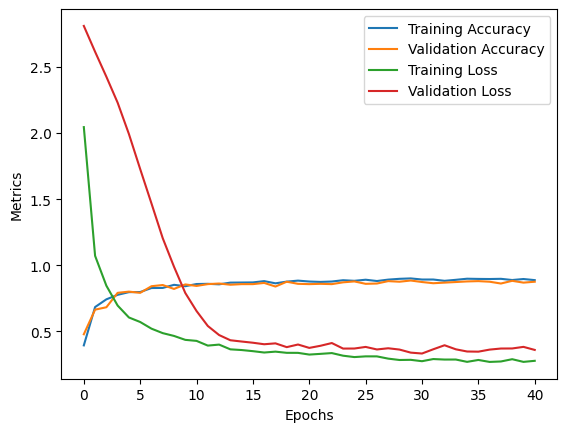

In [ ]:
# Membangun model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(y.unique()), activation='softmax')  # Output layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callback untuk early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[callback]
)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot akurasi dan loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()



In [ ]:
#save model
model.save('nn.h5')


=== Prediction Examples ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Top Recommendations (Multiple Classes):
1. Crop: goni, Probability: 93.91%
Informasi Tanaman:
Gambar:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


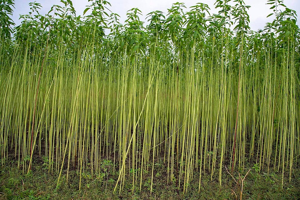

Deskripsi: Goni adalah tanaman tropis yang menghasilkan buah besar yang mirip dengan durian tetapi lebih manis. Buahnya digunakan dalam berbagai hidangan dan cukup populer di Asia Tenggara
Jenis Tanah: Tanah berpasir dengan drainase yang baik.
pH Tanah: 5.5 – 7.0
Waktu Penanaman: 3-5 tahun
Cara Merawat: Penyiraman 2-3 kali seminggu selama musim kering. Pemangkasan tahunan untuk membentuk pohon dan mempercepat produksi.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Top Recommendations (Multiple Classes):
1. Crop: kopi, Probability: 99.10%
Informasi Tanaman:
Gambar:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


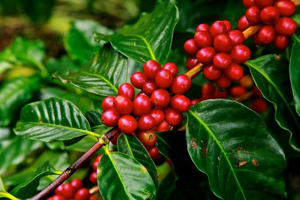

Deskripsi: Tanaman perkebunan yang menghasilkan biji kopi. Memerlukan iklim sejuk dan tanah yang subur.
Jenis Tanah: Tanah lempung, subur, berdrainase
pH Tanah: 6.0 - 6.5
Waktu Penanaman: 3-4 tahun
Cara Merawat: Penyiraman 2 kali seminggu. Tanaman memerlukan pemangkasan untuk meningkatkan kualitas biji.



In [ ]:
def predict_crop(temperature, humidity, rainfall):
    # Validasi input terhadap rentang parameter
    temperature = max(min(temperature, parameter_ranges.loc['max', 'temperature']), parameter_ranges.loc['min', 'temperature'])
    humidity = max(min(humidity, parameter_ranges.loc['max', 'humidity']), parameter_ranges.loc['min', 'humidity'])
    rainfall = max(min(rainfall, parameter_ranges.loc['max', 'rainfall']), parameter_ranges.loc['min', 'rainfall'])

    # Normalisasi input
    new_data = [[temperature, humidity, rainfall]]
    new_data_normalized = scaler.transform(new_data)
    predictions = model.predict(new_data_normalized)[0]

    # Tentukan rentang probabilitas
    threshold_min = 0.1  # Minimum probabilitas
    threshold_max = 1.0  # Maksimum probabilitas

    # Filter kelas berdasarkan probabilitas
    predictions_tensor = tf.constant(predictions, dtype=tf.float32)
    filtered_indices = tf.where(
        (predictions_tensor >= threshold_min) & (predictions_tensor <= threshold_max)
    )
    filtered_indices = tf.squeeze(filtered_indices).numpy()

    # Pastikan filtered_indices iterable
    if isinstance(filtered_indices, np.int64):
        filtered_indices = [filtered_indices]

    # Tampilkan hasil prediksi
    if len(filtered_indices) > 0:
        filtered_probabilities = [predictions[i] for i in filtered_indices]
        recommended_labels = label_encoder.inverse_transform(filtered_indices)

        # Gabungkan label dan probabilitas untuk diurutkan
        results = sorted(zip(recommended_labels, filtered_probabilities), key=lambda x: x[1], reverse=True)

        # Cetak hasil dengan probabilitas tertinggi di atas
        print("Top Recommendations (Multiple Classes):")
        for i, (label, prob) in enumerate(results):
            print(f"{i + 1}. Crop: {label}, Probability: {prob * 100:.2f}%")
            if label in tanaman_data:
                print("Informasi Tanaman:")
                print("Gambar:")
                image = Image.open(requests.get(tanaman_data[label]['gambar'], stream=True).raw)
                image.thumbnail((300, 300))
                display(image)
                print(f"Deskripsi: {tanaman_data[label]['deskripsi']}")
                print(f"Jenis Tanah: {tanaman_data[label]['jenis_tanah']}")
                print(f"pH Tanah: {tanaman_data[label]['ph']}")
                print(f"Waktu Penanaman: {tanaman_data[label]['waktu_penanaman']}")
                print(f"Cara Merawat: {tanaman_data[label]['cara_merawat']}")
                print()
    else:
        print("No recommendations meet the specified probability range.")

# Contoh Prediksi
print("\n=== Prediction Examples ===")
predict_crop(25, 88, 158)
predict_crop(25.540477, 58.869846,  158.066295)


In [ ]:
#from PIL import Image
##from IPython.display import display

# Menampilkan semua gambar tanaman
#for tanaman, data in tanaman_data.items():
 #   try:
  #      # Mendapatkan gambar dari URL
   #     image = Image.open(requests.get(data['gambar'], stream=True).raw)
    #    image.thumbnail((300, 300))  # Mengubah ukuran gambar agar lebih kecil
     #   display(image)  # Menampilkan gambar
      #  print(f"Gambar untuk {tanaman}:")
        #print(f"Deskripsi: {data['deskripsi']}")
       # print(f"Jenis Tanah: {data['jenis_tanah']}")
       # print(f"pH Tanah: {data['ph']}")
        #print(f"Waktu Penanaman: {data['waktu_penanaman']}")
        #print(f"Cara Merawat: {data['cara_merawat']}")
        #print()
   # except Exception as e:
      #  print(f"Error menampilkan gambar untuk {tanaman}: {e}")

In [ ]:
import joblib

# Assuming `scaler` is your StandardScaler object
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
# === Step 1: Convert Model to TFLite ===
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

# Save the model to a TFLite file
#tflite_file_path = "crop_prediction_model.tflite"
#with open(tflite_file_path, "wb") as f:
#    f.write(tflite_model)

#print(f"Model has been successfully saved as TFLite: {tflite_file_path}")


In [ ]:
joblib.dump(parameter_ranges, 'parameter_ranges.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(tanaman_data, 'tanaman_data.pkl')

['tanaman_data.pkl']